## Malaria Cell Images

### Detecting Malaria by Using Cell image Classification

### Image Classification using Simple Convolutional Neural Network

#### Dataset is from Kaggle originated from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

#### Dataset contains 2 folders
    - Infected
    - Uninfected
    - Total of 27,558 images

In [1]:
# Importing libraries
import numpy as np
import os
import shutil
import random 
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import keras
import tensorflow as tf
from keras.optimizers import Adam
from keras.models import Sequential
from keras.preprocessing import image
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

/home/niraj/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
# Dataset Path
train_path = 'cell_images/train'

test_path = 'cell_images/test/'

In [3]:
# Creating Train and Test Batches
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['Parasitized', 'Uninfected'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['Parasitized', 'Uninfected'], batch_size=10)

Found 4048 images belonging to 2 classes.
Found 2445 images belonging to 2 classes.


In [4]:
# Images labels
imgs, labels = next(train_batches)

In [5]:
# Function for  plotting Images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

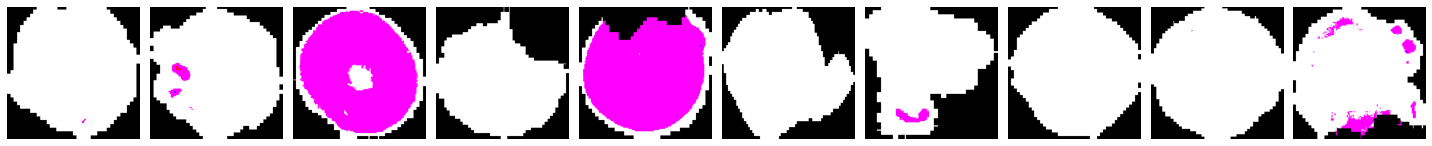

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [6]:
# Plbotting Images
plotImages(imgs)
print(labels)

In [7]:
# Creating Model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [8]:
# Summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [9]:
# Compiling Model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
# Fitting Model
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=test_batches,
    validation_steps=len(test_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
405/405 - 283s - loss: 5.1746 - accuracy: 0.6243 - val_loss: 1.0066 - val_accuracy: 0.7276
Epoch 2/10
405/405 - 276s - loss: 0.4928 - accuracy: 0.8305 - val_loss: 0.2189 - val_accuracy: 0.9436
Epoch 3/10
405/405 - 274s - loss: 0.2128 - accuracy: 0.9249 - val_loss: 0.0895 - val_accuracy: 0.9800
Epoch 4/10
405/405 - 275s - loss: 0.1015 - accuracy: 0.9674 - val_loss: 0.0600 - val_accuracy: 0.9873
Epoch 5/10
405/405 - 273s - loss: 0.0572 - accuracy: 0.9849 - val_loss: 0.0474 - val_accuracy: 0.9955
Epoch 6/10
405/405 - 270s - loss: 0.0409 - accuracy: 0.9943 - val_loss: 0.0297 - val_accuracy: 0.9967
Epoch 7/10
405/405 - 271s - loss: 0.0278 - accuracy: 0.9923 - val_loss: 0.0268 - val_accuracy: 0.9947
Epoch 8/10
405/405 - 271s - loss: 0.0602 - accuracy: 0.9827 - val_loss: 0.1076 - val_accuracy: 0.9751
Epoch 9/10
405/405 - 270s - loss: 0.0667 - accuracy: 0.9778 - val_loss: 0.0534 - val_accuracy: 0.9832
Epoch 10/10
405/405 - 271s - loss: 0.0738 - accuracy: 0.9743 - val_loss: 0.0434 - 

In [11]:
# Labels of test Images
test_imgs, test_labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

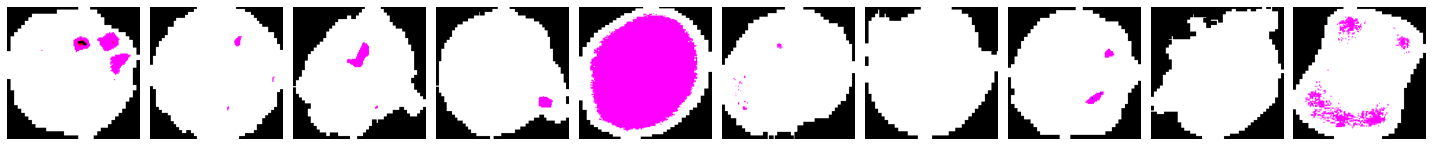

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [12]:
# Plotting Test Images
plotImages(test_imgs)
print(test_labels)

In [13]:
# Predicting Images
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [14]:
# round predictions
np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [15]:
# Confusion matrix for predictions
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [16]:
# Function from sklearn
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    
    
    
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
# test indices
test_batches.class_indices

{'Parasitized': 0, 'Uninfected': 1}

Confusion matrix, without normalization
[[613 611]
 [618 603]]


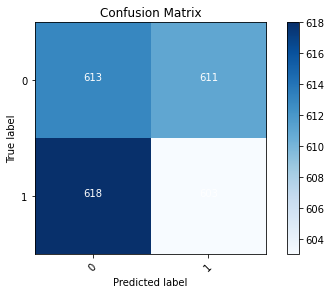

In [18]:
import itertools
cm_plot_labels = ['0','1']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')